# Editor contribution timeline

aka github-like

In [1]:
edits_count = sql("""
SELECT date_trunc('day', edit.open_time) AS date,
       COUNT(*) AS cnt
  FROM edit
  JOIN editor ON editor.id = edit.editor
 WHERE editor.name = 'loujin'
-- AND edit.open_time >= '2017-01-01'
GROUP BY date
ORDER BY cnt DESC
-- LIMIT 1000
;
""")

In [2]:
edits_count.index = edits_count.date.astype('int')*1e-9

In [3]:
edits_count.head()

,date,cnt
date,,
1.356998e+09,2013-01-01 00:00:00+00:00,4845
1.475798e+09,2016-10-07 00:00:00+00:00,4423
1.464307e+09,2016-05-27 00:00:00+00:00,4178
1.444954e+09,2015-10-16 00:00:00+00:00,4049
1.452470e+09,2016-01-11 00:00:00+00:00,4032


In [4]:
# Transform into JSON
data = edits_count.cnt.to_json()

# Send to Javascript
import json
from IPython.display import Javascript
Javascript("""window.data={};""".format(json.dumps(data, indent=4)))

<IPython.core.display.Javascript object>

In [6]:
%%javascript

element.append('<div id="cal-heatmap" style="width: 100%; height: 100%;"></div>');

require.config({
    paths: {
        heatmap: '//cdnjs.cloudflare.com/ajax/libs/cal-heatmap/3.6.2/cal-heatmap.min',
        d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.5.6/d3.min',
    }
});

require(['heatmap', 'd3'], function(heatmap, d3) {
    let range = (start, end) => [...Array(end - start + 1)].map((_, i) => start + i);
    let cal, h3;
    for (let year of range(2012, 2017)) {
        h3 = document.createElement('h3');
        h3.textContent = year;
        document.getElementById('cal-heatmap').appendChild(h3);
        cal = new CalHeatMap();
        cal.init({
            range: 12,
            domain: 'month',
            subDomain: 'day',
            start: new Date(year, 0),
            data: JSON.parse(window.data),
            legend: [1, 5, 10, 100, 1000, 10000],
            legendVerticalPosition: 'top',
            verticalOrientation: false,
            highlight: 'now',
            tooltip: true
        });
    }
})

<IPython.core.display.Javascript object>

In [6]:
%%html
<script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.6/d3.min.js" charset="utf-8"></script>
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/cal-heatmap/3.6.2/cal-heatmap.css" />
<script src="https://cdnjs.cloudflare.com/ajax/libs/cal-heatmap/3.6.2/cal-heatmap.min.js" charset="utf-8"></script>

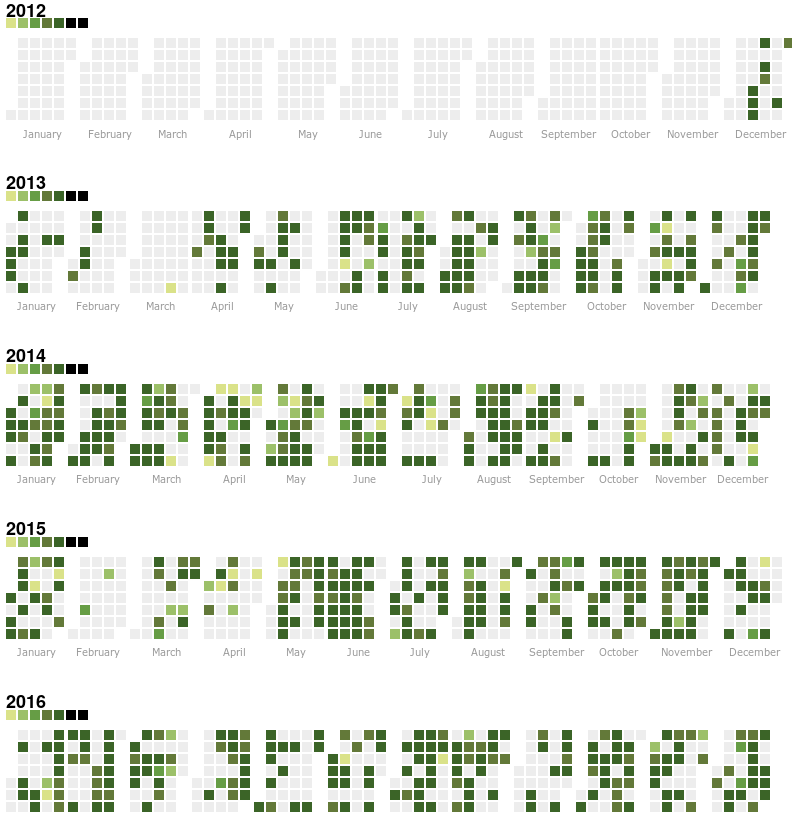

In [7]:
from IPython.display import Image
Image("16-editor_contribution_timeline.png")